In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
c:\Users\diego\anaconda3\envs\entornoGPU\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
df = pd.read_csv('creditcard.csv')
df.sort_values("Class",inplace=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
189814,128571.0,-5.809290,0.180870,-2.698260,4.886691,1.496554,1.833805,-1.417844,-6.071499,-3.150815,...,2.303073,-0.183163,0.049842,-0.220697,1.390550,1.035940,1.110960,-1.758895,0.76,0
189815,128571.0,2.136948,0.024433,-2.440339,-0.280203,0.951061,-0.799101,0.607870,-0.314005,0.054811,...,0.152297,0.488799,-0.077620,0.236435,0.479284,0.221746,-0.099236,-0.088561,3.70,0
189816,128571.0,-1.156768,0.135422,3.113868,4.420894,0.757698,1.234795,-1.234156,0.721934,-1.676275,...,0.390024,0.767668,-0.064709,0.746197,-0.080808,0.475584,0.105618,0.128784,9.81,0
189817,128571.0,1.767787,-0.301029,-2.215079,0.511939,0.423751,-0.984541,0.509947,-0.398095,0.540116,...,0.258679,0.570469,-0.257998,-0.764858,0.285443,-0.074687,-0.027915,-0.005763,174.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42741,41227.0,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,-7.383705,...,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,459.07,1
107067,70270.0,-1.512516,1.133139,-1.601052,2.813401,-2.664503,-0.310371,-1.520895,0.852996,-1.496495,...,0.729828,0.485286,0.567005,0.323586,0.040871,0.825814,0.414482,0.267265,318.11,1
10897,18690.0,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.00,1
191690,129371.0,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,-2.959806,...,0.109185,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,0.00,1


In [4]:
X_train = df.iloc[:283823].drop(columns=['Class'])
X_test = df.iloc[283823:].drop(columns=['Class'])
y_test = df.iloc[283823:]['Class']

In [10]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
189814,128571.0,-5.809290,0.180870,-2.698260,4.886691,1.496554,1.833805,-1.417844,-6.071499,-3.150815,...,-1.809004,2.303073,-0.183163,0.049842,-0.220697,1.390550,1.035940,1.110960,-1.758895,0.76
189815,128571.0,2.136948,0.024433,-2.440339,-0.280203,0.951061,-0.799101,0.607870,-0.314005,0.054811,...,-0.223070,0.152297,0.488799,-0.077620,0.236435,0.479284,0.221746,-0.099236,-0.088561,3.70
189816,128571.0,-1.156768,0.135422,3.113868,4.420894,0.757698,1.234795,-1.234156,0.721934,-1.676275,...,0.554596,0.390024,0.767668,-0.064709,0.746197,-0.080808,0.475584,0.105618,0.128784,9.81
189817,128571.0,1.767787,-0.301029,-2.215079,0.511939,0.423751,-0.984541,0.509947,-0.398095,0.540116,...,0.191255,0.258679,0.570469,-0.257998,-0.764858,0.285443,-0.074687,-0.027915,-0.005763,174.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95537,65361.0,1.310040,0.135429,-0.346918,0.332604,0.334095,0.154999,-0.144848,0.128399,0.401827,...,-0.183994,-0.372975,-1.123394,0.007562,-1.418554,0.268160,0.217063,-0.020425,0.009314,1.98
95538,65362.0,0.974371,-1.260500,1.582824,1.167159,-1.817782,0.949146,-1.382103,0.465607,0.770596,...,-0.498786,-0.423865,-0.506222,-0.027914,0.031625,0.281245,-0.252867,0.118275,0.052917,106.90
95539,65363.0,1.283160,1.155908,-2.073017,1.266557,1.389442,-0.857346,0.596036,-0.119527,-0.504488,...,-0.035944,-0.243743,-0.674719,-0.356964,-1.184763,0.955304,-0.236761,0.029020,0.073510,2.69
95540,65363.0,0.959204,-1.228912,0.087607,-1.532523,-1.026729,-0.423463,-0.224394,-0.207702,-0.048673,...,0.007642,-0.385284,-0.925837,-0.074149,-0.289046,0.253263,-0.871558,0.074416,0.071335,220.00


In [63]:
y_test.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [64]:
scaler = RobustScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Clase base para facilitar reutilización
class BaseAutoencoder(nn.Module):
    def __init__(self):
        super(BaseAutoencoder, self).__init__()

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [2]:
class AE1(BaseAutoencoder):
    def __init__(self):
        super(AE1, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(30, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 30)
        )


In [3]:
class AE2(BaseAutoencoder):
    def __init__(self):
        super(AE2, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(30, 25),
            nn.ReLU(),
            nn.Linear(25, 15),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(15, 25),
            nn.ReLU(),
            nn.Linear(25, 30)
        )


In [4]:
class AE3(BaseAutoencoder):
    def __init__(self):
        super(AE3, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(30, 28),
            nn.ReLU(),
            nn.Linear(28, 26),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(26, 28),
            nn.ReLU(),
            nn.Linear(28, 30)
        )


In [11]:
from torch.utils.data import DataLoader, TensorDataset

# Asegura reproducibilidad
torch.manual_seed(42)

# Si hay GPU, úsala
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convierte los datos en tensores
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)

# DataLoaders
train_loader = DataLoader(TensorDataset(X_train_tensor, X_train_tensor), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, X_test_tensor), batch_size=64, shuffle=False)

In [70]:
def train_autoencoder(model, train_loader, test_loader, epochs=50, lr=1e-3):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    
    train_losses, test_losses = [], []

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for x_batch, _ in train_loader:
            output = model(x_batch)
            loss = criterion(output, x_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        train_losses.append(epoch_loss / len(train_loader))
        
        # Evaluación
        model.eval()
        with torch.no_grad():
            val_loss = sum(criterion(model(xb), xb).item() for xb, _ in test_loader) / len(test_loader)
        test_losses.append(val_loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch:02d}: Train Loss = {train_losses[-1]:.4f}, Test Loss = {test_losses[-1]:.4f}")
    
    return train_losses, test_losses

In [71]:
ae1 = AE1()
ae2 = AE2()
ae3 = AE3()

print("Entrenando AE1...")
loss_ae1, val_ae1 = train_autoencoder(ae1, train_loader, test_loader)

print("Entrenando AE2...")
loss_ae2, val_ae2 = train_autoencoder(ae2, train_loader, test_loader)

print("Entrenando AE3...")
loss_ae3, val_ae3 = train_autoencoder(ae3, train_loader, test_loader)

Entrenando AE1...
Epoch 00: Train Loss = 8046265.5110, Test Loss = 18.6694
Epoch 10: Train Loss = 197.3547, Test Loss = 64.1185
Epoch 20: Train Loss = 202.0149, Test Loss = 13.7920
Epoch 30: Train Loss = 176.9051, Test Loss = 37.3129
Epoch 40: Train Loss = 158.7246, Test Loss = 18.3933
Entrenando AE2...
Epoch 00: Train Loss = 5327629.9588, Test Loss = 28.6173
Epoch 10: Train Loss = 458.0110, Test Loss = 14.3391
Epoch 20: Train Loss = 277.4881, Test Loss = 16.1284
Epoch 30: Train Loss = 347.7153, Test Loss = 36.6004
Epoch 40: Train Loss = 296.1768, Test Loss = 156.2882
Entrenando AE3...
Epoch 00: Train Loss = 5846164.6419, Test Loss = 219.1751
Epoch 10: Train Loss = 522.3568, Test Loss = 56.9427
Epoch 20: Train Loss = 391.7601, Test Loss = 33.8946
Epoch 30: Train Loss = 380.5997, Test Loss = 19.6679
Epoch 40: Train Loss = 360.1716, Test Loss = 16.3353


In [12]:
# Guardar los modelos
#torch.save(ae1.state_dict(), 'ae1.pth')
#torch.save(ae2.state_dict(), 'ae2.pth')
#torch.save(ae3.state_dict(), 'ae3.pth')

# Cargar los modelos
ae1 = AE1()
ae1.load_state_dict(torch.load('ae1.pth'))
ae1.to(device)

ae2 = AE2()
ae2.load_state_dict(torch.load('ae2.pth'))
ae2.to(device)

ae3 = AE3()
ae3.load_state_dict(torch.load('ae3.pth'))
ae3.to(device)

AE3(
  (encoder): Sequential(
    (0): Linear(in_features=30, out_features=28, bias=True)
    (1): ReLU()
    (2): Linear(in_features=28, out_features=26, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=26, out_features=28, bias=True)
    (1): ReLU()
    (2): Linear(in_features=28, out_features=30, bias=True)
  )
)


AE1 Evaluation
[[467  25]
 [ 44 448]]
              precision    recall  f1-score   support

           0     0.9139    0.9492    0.9312       492
           1     0.9471    0.9106    0.9285       492

    accuracy                         0.9299       984
   macro avg     0.9305    0.9299    0.9299       984
weighted avg     0.9305    0.9299    0.9299       984


AE2 Evaluation
[[467  25]
 [ 46 446]]
              precision    recall  f1-score   support

           0     0.9103    0.9492    0.9294       492
           1     0.9469    0.9065    0.9263       492

    accuracy                         0.9278       984
   macro avg     0.9286    0.9278    0.9278       984
weighted avg     0.9286    0.9278    0.9278       984


AE3 Evaluation
[[467  25]
 [ 83 409]]
              precision    recall  f1-score   support

           0     0.8491    0.9492    0.8964       492
           1     0.9424    0.8313    0.8834       492

    accuracy                         0.8902       984
   macro av

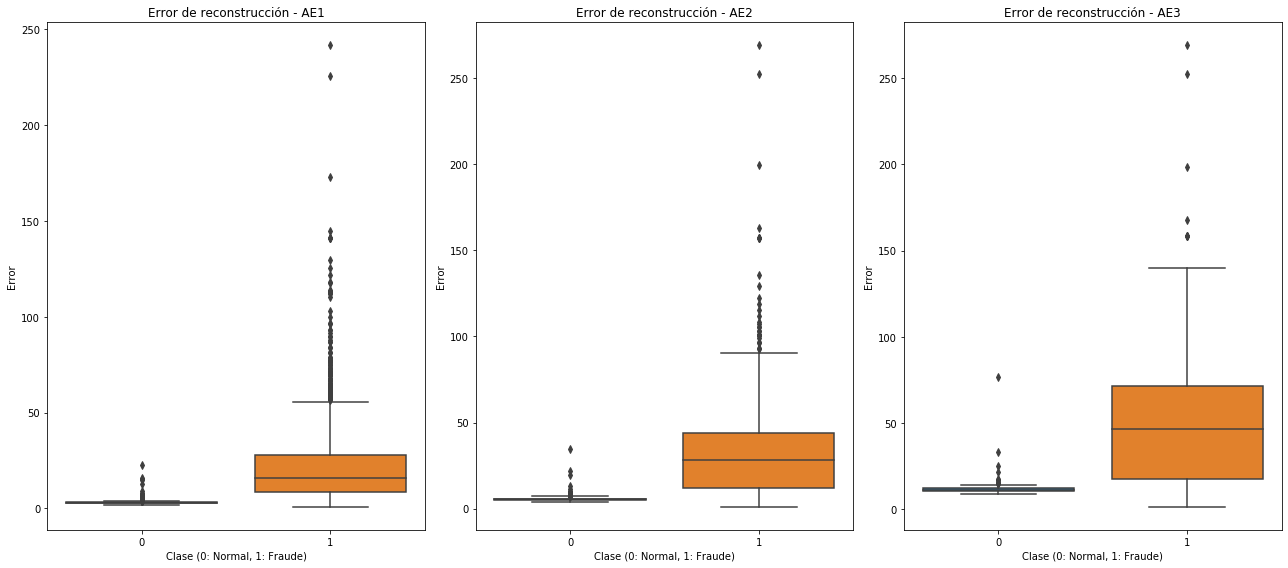

In [ ]:
def evaluate_autoencoder(model, X_test_tensor, X_test_df, y_test, name='AE'):
    model.eval()
    with torch.no_grad():
        reconstructions = model(X_test_tensor).cpu().numpy()
    
    errors = np.mean((reconstructions - X_test_df.values)**2, axis=1)
    threshold = np.percentile(errors[y_test == 0], 95)
    y_pred = (errors > threshold).astype(int)

    print(f"\n{name} Evaluation")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))

    return errors

# Evaluar los tres modelos
errors_ae1 = evaluate_autoencoder(ae1, X_test_tensor, X_test, y_test, name='AE1')
errors_ae2 = evaluate_autoencoder(ae2, X_test_tensor, X_test, y_test, name='AE2')
errors_ae3 = evaluate_autoencoder(ae3, X_test_tensor, X_test, y_test, name='AE3')

# Crear DataFrame para los boxplots
errors_df = pd.DataFrame({
    'AE1': errors_ae1,
    'AE2': errors_ae2,
    'AE3': errors_ae3,
    'Class': y_test.values
})

# Boxplots
plt.figure(figsize=(18, 8))
for i, ae in enumerate(['AE1', 'AE2', 'AE3'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Class', y=ae, data=errors_df)
    plt.title(f'Error de reconstrucción - {ae}')
    plt.xlabel('Clase (0: Normal, 1: Fraude)')
    plt.ylabel('Error')
    plt.ylim(0, 275)
plt.tight_layout()
plt.show()


In [ ]:
ae2.eval()
with torch.no_grad():
    reconstructions = ae2(X_test_tensor).cpu().numpy()
    
    errors = (reconstructions - X_test.values)**2

mean_errors = np.mean(errors, axis=1)
threshold = np.percentile(mean_errors[y_test == 0], 95)
y_pred = (mean_errors > threshold).astype(int)

In [75]:
df_errores = pd.DataFrame(errors,columns=X_test.columns)
df_errores["Class"] = y_test.values
df_errores["Pred"] = y_pred
df_errores.drop(columns=["Amount"],inplace=True)
df_errores.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Pred'],
      dtype='object')

In [77]:
columnas_error = [col for col in df_errores.columns if col not in ["Class", "Pred"]]

df_largo = df_errores.melt(
    id_vars=["Class"],
    value_vars=columnas_error,
    var_name="Variable",
    value_name="Error"
)

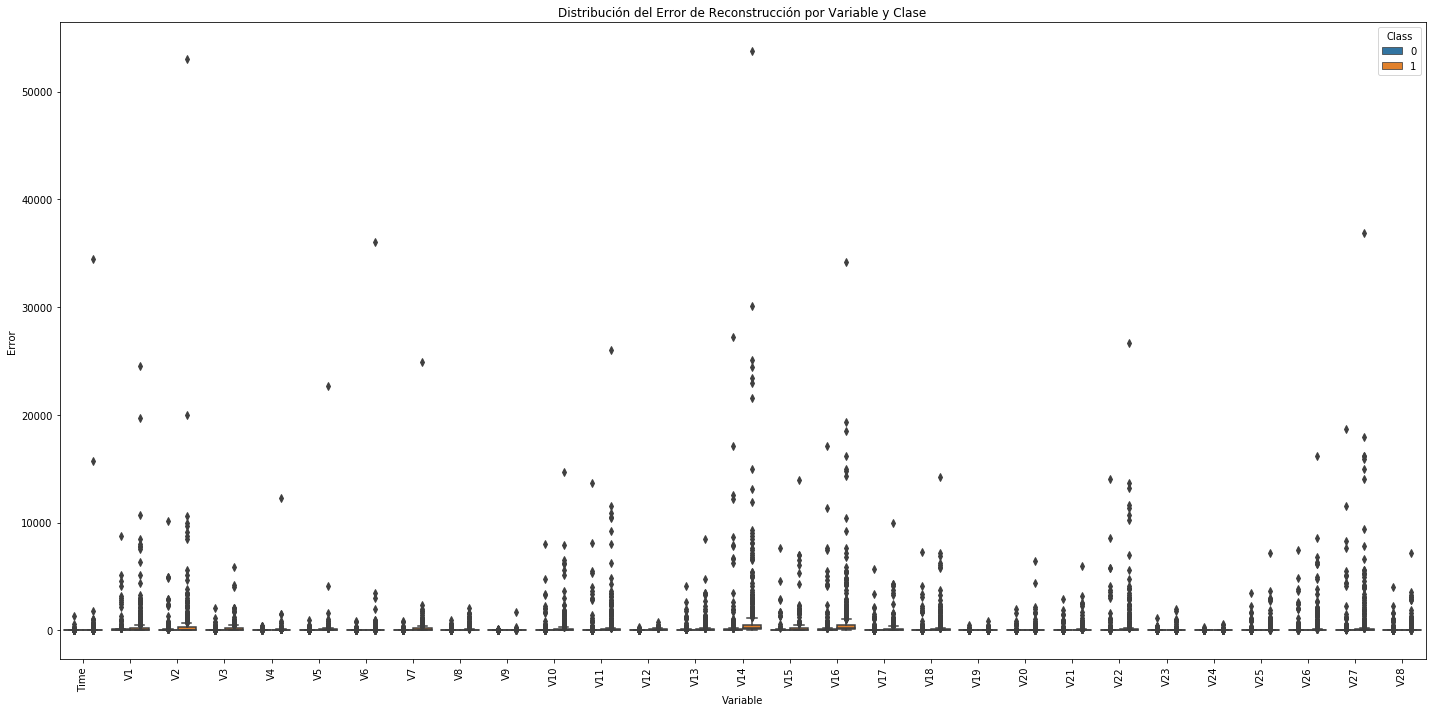

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.boxplot(data=df_largo, x="Variable", y="Error", hue="Class")
plt.xticks(rotation=90)
plt.title("Distribución del Error de Reconstrucción por Variable y Clase")
plt.tight_layout()
plt.show()